In [ ]:
QUESTION - 1 
Introduction: Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

In [1]:
#STEP 1
import numpy as np  # Import Numpy library and use the standard abbreviation \"np\"\n",
import pandas as pd # Import Pandas library and use the standard abbreviation \"pd\"\n",
import urllib

In [2]:
#STEP 2
dataset_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
urlRequest = urllib.request.Request(dataset_url)
users_file = urllib.request.urlopen(urlRequest)

In [3]:
#STEP 3
users=pd.read_csv(users_file,sep='|',header=0,names=['user_id','age','gender','occupation','zip_code'])
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
#STEP 4 
mean_of_age=users['age'].mean()
mean_of_age

34.05196182396607

In [6]:
#STEP 5
df=users[users.gender=='M']

df=(df.groupby(['occupation','gender'])['gender'].agg(['count'])/100).sort_values(by=['count'], ascending=False)
df.head()

,,count
occupation,gender,
student,M,1.36
other,M,0.69
educator,M,0.69
engineer,M,0.65
programmer,M,0.60


In [7]:
#STEP 6
occupation = users.groupby('occupation')
age=occupation.age
min_age=age.min()
max_age=age.max()
pd.DataFrame({'min age':min_age,'max age':max_age})

,min age,max age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [8]:
#STEP 7
occupation_gender = users.groupby(['occupation','gender'])
mean_age=occupation_gender['age'].mean().round(1)
pd.DataFrame({'mean age':mean_age})

mean age
occupation    gender          
administrator F           40.6
              M           37.2
artist        F           30.3
              M           32.3
doctor        M           43.6
educator      F           39.1
              M           43.1
engineer      F           29.5
              M           36.6
entertainment F           31.0
              M           29.0
executive     F           44.0
              M           38.2
healthcare    F           39.8
              M           45.4
homemaker     F           34.2
              M           23.0
lawyer        F           39.5
              M           36.2
librarian     F           40.0
              M           40.0
marketing     F           37.2
              M           37.9
none          F           36.5
              M           18.6
other         F           35.5
              M           34.0
programmer    F           32.2
              M           33.2
retired       F           70.0
              M           62.5
salesman      F           27.0
              M           38.6
scientist     F           28.3
              M           36.3
student       F           20.8
              M           22.7
technician    F           38.0
              M           33.0
writer        F           37.6
              M           35.3

In [9]:
#STEP 8
occupation = users.groupby(['occupation'])
men_and_women = occupation.gender
precentage=(men_and_women.value_counts(normalize=True)*100).round(1).astype(str)+'%'
pd.DataFrame({'presentage':precentage})

presentage
occupation    gender           
administrator M           54.4%
              F           45.6%
artist        M           53.6%
              F           46.4%
doctor        M          100.0%
educator      M           72.6%
              F           27.4%
engineer      M           97.0%
              F            3.0%
entertainment M           88.9%
              F           11.1%
executive     M           90.6%
              F            9.4%
healthcare    F           68.8%
              M           31.2%
homemaker     F           85.7%
              M           14.3%
lawyer        M           83.3%
              F           16.7%
librarian     F           56.9%
              M           43.1%
marketing     M           61.5%
              F           38.5%
none          M           55.6%
              F           44.4%
other         M           65.7%
              F           34.3%
programmer    M           90.9%
              F            9.1%
retired       M           92.9%
              F            7.1%
salesman      M           75.0%
              F           25.0%
scientist     M           90.3%
              F            9.7%
student       M           69.4%
              F           30.6%
technician    M           96.3%
              F            3.7%
writer        M           57.8%
              F           42.2%

In [ ]:
Question 2
Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep
Step 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [10]:
#Step 1
import pandas as pd
import urllib
import numpy as np

In [11]:
#step 2
dataset_url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
urlRequest = urllib.request.Request(dataset_url)
euro12_file = urllib.request.urlopen(urlRequest)

In [12]:
#step 3
euro12 =pd.read_csv(euro12_file)
euro12.head(3)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15


In [13]:
#step 4
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [14]:
#step 5
euro12['Team'].count()

16

In [15]:
#step 6
euro12.shape[1]

35

In [16]:
#step 7
discipline=euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [17]:
#step 8
discipline=discipline.sort_values(by=['Red Cards','Yellow Cards'], ascending=True)
discipline

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [18]:
#step 9
discipline.groupby('Team')['Yellow Cards'].agg('mean')

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [19]:
#step 10
euro12.loc[euro12['Goals']>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [20]:
#step 11
euro12[euro12['Team'].str.contains('^G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [21]:
#step 12
euro12.head(7)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [22]:
#step 13
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [23]:
#step 14
euro12.loc[(euro12['Team']=='England') | (euro12['Team']=='Russia') | (euro12['Team']=='Italy'),['Team','Shooting Accuracy']]


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [ ]:
Question 3
## Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4 • The second a random number from 1 to 3 • The third a random number from 10,000 to 30,000

Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [24]:
#step 1
import numpy as np
import pandas as pd

In [25]:
#step 2
series1=pd.Series(np.random.randint(1,4,size=100))
series2=pd.Series(np.random.randint(1,3,size=100))
series3=pd.Series(np.random.randint(10000,30000,size=100))

In [26]:
#step 3
df=pd.DataFrame({'Series 1':series1,'Series 2':series2,'Series 3':series3})
df

,Series 1,Series 2,Series 3
0,1,2,20296
1,3,1,29221
2,3,2,14051
3,2,1,16104
4,1,1,12855
...,...,...,...
95,1,1,24718
96,3,1,13153
97,3,1,24949
98,2,1,19058


In [27]:
#step 4
df=df.rename(columns={'Series 1':'bedrs','Series 2':'bathrs','Series 3':'price_sqr_meter'})
df

,bedrs,bathrs,price_sqr_meter
0,1,2,20296
1,3,1,29221
2,3,2,14051
3,2,1,16104
4,1,1,12855
...,...,...,...
95,1,1,24718
96,3,1,13153
97,3,1,24949
98,2,1,19058


In [28]:
#step 5
df2=pd.concat([series1,series2,series3],axis=0)
df2

0         1
1         3
2         3
3         2
4         1
      ...  
95    24718
96    13153
97    24949
98    19058
99    28607
Length: 300, dtype: int32

In [29]:
#step 6
df2.tail()
#yes! it is true

95    24718
96    13153
97    24949
98    19058
99    28607
dtype: int32

In [30]:
#step 7
df2=pd.concat([series1,series2,series3],axis=0,ignore_index=True)
df2

0          1
1          3
2          3
3          2
4          1
       ...  
295    24718
296    13153
297    24949
298    19058
299    28607
Length: 300, dtype: int32

In [ ]:
Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL 61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04 61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83 61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71 The first three columns are year, month, and day. The remaining 12 columns areaverage windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries
Step 2. Import the dataset from the attached file wind.txt
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix itand apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all thedays A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.

In [11]:
#step 1
import numpy as np
import pandas as pd
import datetime as dt

In [12]:
#step 2
data=pd.read_fwf('wind.txt')

EmptyDataError: No rows from which to infer column width

In [10]:
#step 3
data["Date"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()


NameError: name 'data' is not defined

In [6]:
#step 4
data["Date"] = np.where(pd.DatetimeIndex(data["Date"]).year < 2000,data.Date,data.Date - pd.offsets.DateOffset(years=100))
data.head()

NameError: name 'data' is not defined

In [7]:
#step 5
data = data.set_index("Date")
data.index.astype("datetime64[ns]")


NameError: name 'data' is not defined

In [ ]:
#step 6
data.isnull().values.ravel().sum()


In [4]:
#step 7
data.count().sum()


NameError: name 'data' is not defined

In [5]:
#step 8
pd.DataFrame(data.mean())

NameError: name 'data' is not defined

In [34]:
#step 9
def stats(stats):
    stats = pd.Series(stats)
    Min = stats.min()
    Max = stats.max()
    Mean = stats.mean()
    Std = stats.std()
    res = [Min,Max,Mean,Std]
    indx = ["Min","Max","Mean","Std"]
    res = pd.Series(res,index=indx)
    return res
loc_stats = data.apply(stats)
pd.DataFrame(loc_stats)

NameError: name 'data' is not defined

In [35]:
#step 10
day_stats = data.apply(stats,axis=1)
pd.DataFrame(day_stats.head())

NameError: name 'data' is not defined

In [36]:
#step 11
jan_data = data[data.index.month == 1]
pd.DataFrame(jan_data.mean())

NameError: name 'data' is not defined

In [37]:
#step 12
data.resample('A').mean()

NameError: name 'data' is not defined

In [38]:
#step 13
data.resample('M').mean()

NameError: name 'data' is not defined

In [39]:
#step 14
data.resample('W').mean()

NameError: name 'data' is not defined

In [40]:
#step 15
first_year = data[data.index.year == 1961]
stats1 = data.resample('W').mean().apply(lambda x: x.describe())
stats1

NameError: name 'data' is not defined

In [ ]:
Question 5
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float • Check the item price type • Create a lambda function and change the type of item price • Check the item price type

Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

In [15]:
#step 1
import pandas as pd
import numpy as np
import urllib


In [16]:
#step 2
dataset_url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
urlRequest = urllib.request.Request(dataset_url)
chipo_file = urllib.request.urlopen(urlRequest)


In [17]:
#step 3
chipo=pd.read_csv(chipo_file,sep='\t')


In [18]:
#step 4
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [19]:
#step 5
chipo.count()


order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

In [20]:
#step 6
chipo.shape[1]


5

In [21]:
#step 7
chipo.columns


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [22]:
#step 8
chipo.index


RangeIndex(start=0, stop=4622, step=1)

In [23]:
#step 9
a=chipo.groupby('item_name').sum().sort_values(by=['quantity'], ascending=False)
a.T.columns[0]


C:\Users\Ini\AppData\Local\Temp\ipykernel_11344\1379537848.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=chipo.groupby('item_name').sum().sort_values(by=['quantity'], ascending=False)


'Chicken Bowl'

In [24]:
#step 10
a['quantity'][0]


761

In [25]:
#step 11
a=chipo.groupby('choice_description').sum().sort_values(by=['quantity'], ascending=False)
a.T.columns[0]


C:\Users\Ini\AppData\Local\Temp\ipykernel_11344\3447979120.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=chipo.groupby('choice_description').sum().sort_values(by=['quantity'], ascending=False)


'[Diet Coke]'

In [26]:
#step 12
chipo.quantity.sum()

4972

In [53]:
#step 13
chipo.item_price.dtype
price_type = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(price_type)
chipo.item_price.dtype


dtype('float64')

In [54]:
#step 14
(chipo['item_price']*chipo['quantity']).sum()


39237.02

In [55]:
#step 15
chipo.order_id.value_counts().count()


1834

In [56]:
#step 16
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
d = chipo.groupby('order_id').sum()
d.mean()['revenue']


C:\Users\Ini\AppData\Local\Temp\ipykernel_11952\4009684539.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d = chipo.groupby('order_id').sum()


21.39423118865867

In [57]:
#step 17
chipo.item_name.value_counts().count()


50

In [ ]:
Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('us-marriages-divorces-1867-2014.csv')
df.head()

Matplotlib is building the font cache; this may take a moment.


,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


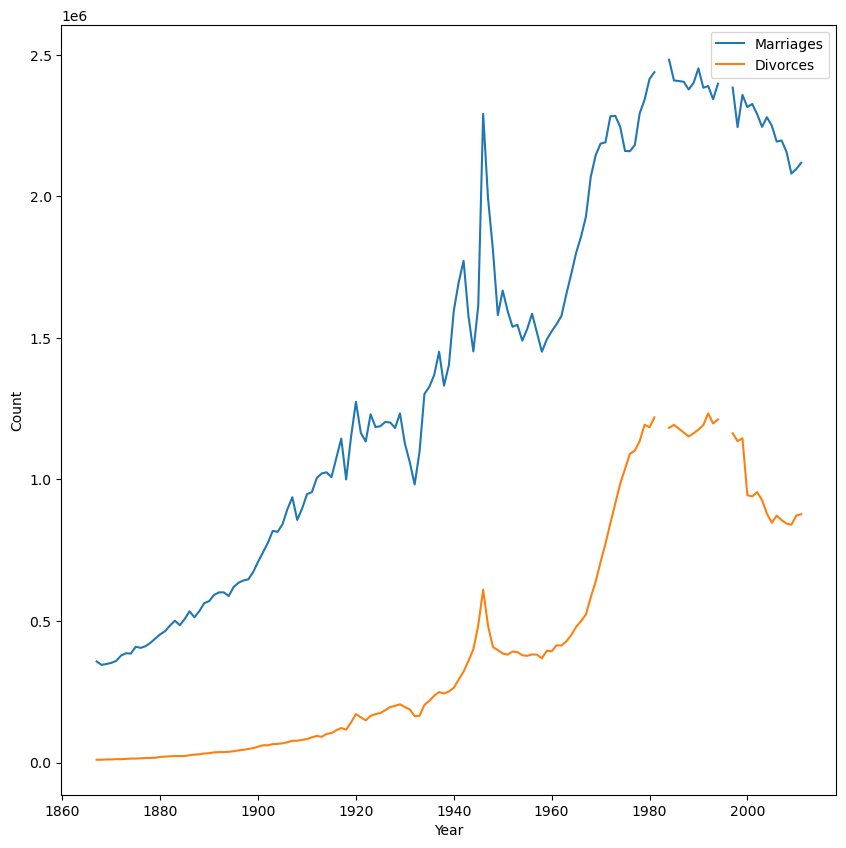

In [28]:
plt.figure(figsize=(10,10))

plt.plot(df['Year'],df['Marriages'],label='Marriages')
plt.plot(df['Year'],df['Divorces'],label='Divorces')

plt.xlabel('Year')
plt.ylabel('Count')


plt.legend()
plt.show()

In [ ]:
Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forget to label your axes!

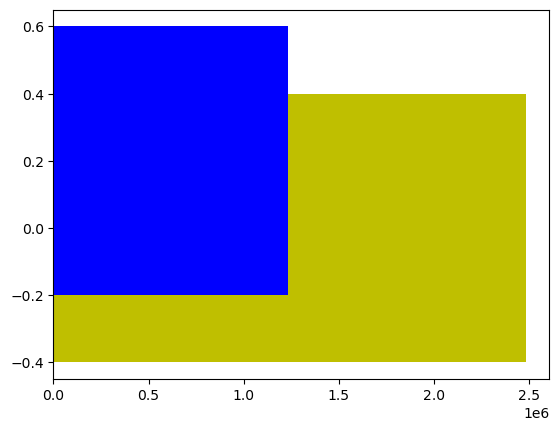

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('us-marriages-divorces-1867-2014.csv')
df.tail()
df=df.loc[(df['Year']<2000) &(df['Year']>1900),['Marriages','Divorces']]

ax = plt.subplot(111)
ax.barh(0.0, df['Marriages'],  color='y', align='center')
ax.barh(0.2, df['Divorces'], color='b', align='center')

plt.show()

In [ ]:
Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

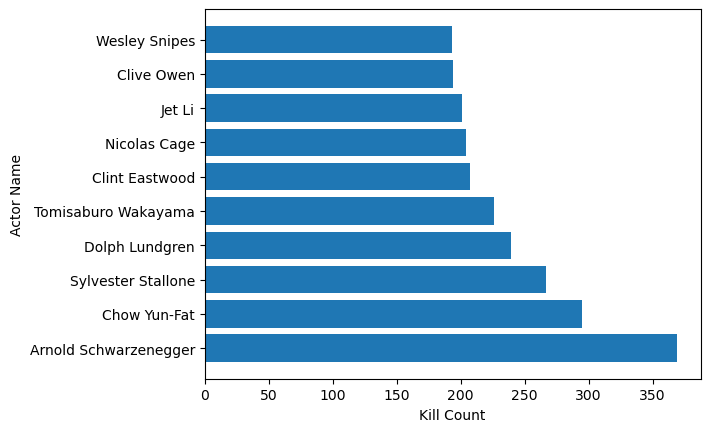

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('actor_kill_counts.csv')

# Sort the actors by their kill count
df_sorted = df.sort_values(by=['Count'], ascending=False)

# Create a horizontal bar chart
plt.barh(df_sorted['Actor'], df_sorted['Count'])

# Label the x and y axes
plt.xlabel('Kill Count')
plt.ylabel('Actor Name')

# Show the chart
plt.show()

In [ ]:
Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

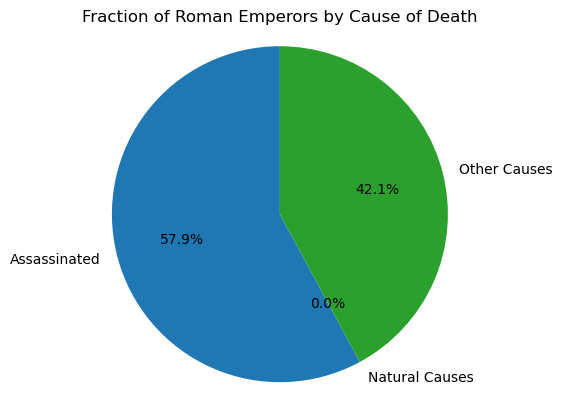

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('roman-emperor-reigns.csv')

assassinated_count = df[df['Cause_of_Death'] == 'Assassinated'].shape[0]
natural_causes_count = df[df['Cause_of_Death'] == 'Natural Causes'].shape[0]
other_causes_count = df[df['Cause_of_Death'].isin(['Illness', 'Executed', 'Killed in battle'])].shape[0]
total_count = df.shape[0]

# Calculate the percentage of emperors who died from different causes
assassinated_percent = assassinated_count / total_count * 100
natural_causes_percent = natural_causes_count / total_count * 100
other_causes_percent = other_causes_count / total_count * 100

# Create a list of the percentages and labels for the pie chart
percentages = [assassinated_percent, natural_causes_percent, other_causes_percent]
labels = ['Assassinated', 'Natural Causes', 'Other Causes']

# Create the pie chart with even circle and percentage labels
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

# Add a title to the pie chart
plt.title('Fraction of Roman Emperors by Cause of Death')

# Display the pie chart
plt.show()

In [ ]:
Question 10
Create a scatter plot showing the relationship between the total revenue earned byarcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to its year.

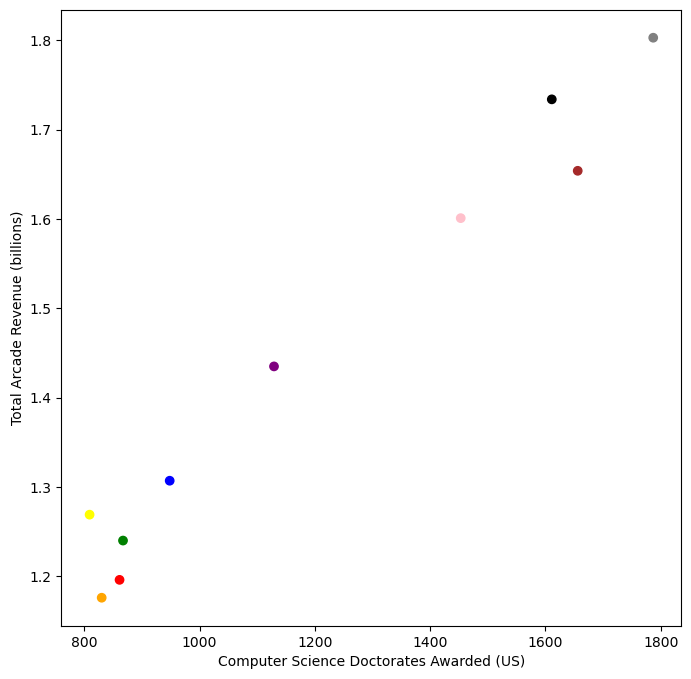

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

color_dict = {2000: 'red', 2001: 'orange', 2002: 'yellow', 2003: 'green', 2004: 'blue', 2005: 'purple', 2006: 'pink', 2007: 'brown', 2008: 'gray', 2009: 'black'}
colors = [color_dict[year] for year in df['Year']]

plt.figure(figsize=(8, 8))
plt.scatter(df['Computer Science Doctorates Awarded (US)'], df['Total Arcade Revenue (billions)'], c=colors)

# Add labels for the x and y axes
plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')

plt.show()